# Machine Learning Part
---
> You will explore how best to apply machine learning algorithms, for example, Neural Network, Boosted Decision Tree (BDT), Support Vector Machine(SVM) to solve a High Energy Data analysis issue, more specifically,  separating the signal events from the background events.
> A set of input samples (simulated with Delphes) is provided in NumPy NPZ format [Download Input]. In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background sample are labeled with 0.
> You can apply one machine learning algorithm to this input but be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Allowing loading of pickled values (disabled by default)
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True)

# Loading the data with a context manager
with np.load('QIS_EXAM_200Events.npz') as data:
    training_input = data['training_input'].tolist()
    test_input = data['test_input'].tolist()

In [2]:
# Segregation of Background and Signal Events    
training_backgroundEvents = training_input['0']
training_signalEvents = training_input['1']

test_backgroundEvents = test_input['0']
test_signalEvents = test_input['1']

# Creating Training Dataset with 50 Background Events and 50 Signal Events
X_train = np.append(training_backgroundEvents,training_signalEvents, axis = 0)
y_train = 50 * [int(0)] + 50 * [int(1)]

# Creating Test Dataset with 50 Background Events and 50 Signal Events
X_test = np.append(test_backgroundEvents,test_signalEvents, axis = 0)
y_test = 50 * [int(0)] + 50 * [int(1)]


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[39 11]
 [21 29]]

Classifier Accuracy (Background Events): 78 %
Classifier Accuracy (Signal Events): 58 %
False Positives: 22 %
False Negatives: 42 %

Note: Here, positive refers to signal events and negative refers to background events.


In [4]:
# Fitting K-Nearest Neighbors to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 3)


classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[38 12]
 [20 30]]

Classifier Accuracy (Background Events): 76 %
Classifier Accuracy (Signal Events): 60 %
False Positives: 24 %
False Negatives: 40 %

Note: Here, positive refers to signal events and negative refers to background events.


In [5]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[38 12]
 [17 33]]

Classifier Accuracy (Background Events): 76 %
Classifier Accuracy (Signal Events): 66 %
False Positives: 24 %
False Negatives: 34 %

Note: Here, positive refers to signal events and negative refers to background events.


In [6]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[39 11]
 [18 32]]

Classifier Accuracy (Background Events): 78 %
Classifier Accuracy (Signal Events): 64 %
False Positives: 22 %
False Negatives: 36 %

Note: Here, positive refers to signal events and negative refers to background events.


In [7]:
# Fitting Gaussian Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[43  7]
 [23 27]]

Classifier Accuracy (Background Events): 86 %
Classifier Accuracy (Signal Events): 54 %
False Positives: 14 %
False Negatives: 46 %

Note: Here, positive refers to signal events and negative refers to background events.


In [8]:
# Fitting Decision Tree Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[32 18]
 [23 27]]

Classifier Accuracy (Background Events): 64 %
Classifier Accuracy (Signal Events): 54 %
False Positives: 36 %
False Negatives: 46 %

Note: Here, positive refers to signal events and negative refers to background events.


In [19]:
# Fitting Multi-Layer Perceptron Network to the Training set
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(8, 4, 2), 
                           random_state=1, max_iter=1000)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm, end='\n\n')
print('Classifier Accuracy (Background Events):', 2*cm[0][0], '%')
print('Classifier Accuracy (Signal Events):', 2*cm[1][1], '%')
print('False Positives:', 2*cm[0][1], '%')
print('False Negatives:', 2*cm[1][0], '%\n')
print('Note: Here, positive refers to signal events and negative refers to background events.')

Confusion Matrix:
 [[29 21]
 [14 36]]

Classifier Accuracy (Background Events): 58 %
Classifier Accuracy (Signal Events): 72 %
False Positives: 42 %
False Negatives: 28 %

Note: Here, positive refers to signal events and negative refers to background events.


---
> * Naive Bayes gives the best classification accuracy for Background Events while giving least false positives.  
> * Multi-Layer Perceptron Network gives the best classification accuracy for Signal Events. We use an alpha value of 1e-3 to maintain a balance between overfitting and underfitting.

> By increasing the size of the dataset (only 100 samples for training taken currently), we can greatly improve the model performance. Also, the test set and training set that were provided were equal in proportion, ie: 100 samples each, whereas it could have been more in the training set and little less in the test set, eg: 80% and 20% respectively.  

> All the features have been sampled and transformed so as to improve training potential.

# Quantum Computing Part
---
## Quantum Computing - Question 1
> Implement a simple quantum operation with Cirq
* With 5 qubits
* Apply Hadamard operation on every qubit
* Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
* SWAP (0, 4)
* Rotate X with pi/2
* Plot the circuit


In [17]:
import cirq
circuit = cirq.Circuit()

(q0, q1, q2, q3, q4) = cirq.LineQubit.range(5)

circuit.append([cirq.H(q0), 
                cirq.H(q1), 
                cirq.H(q2), 
                cirq.H(q3), 
                cirq.H(q4)])

circuit.append([cirq.CNOT(q0, q1), 
                cirq.CNOT(q1, q2), 
                cirq.CNOT(q2, q3), 
                cirq.CNOT(q3, q4)])

circuit.append(cirq.SWAP(q0, q4))

print('Before Rotation:\n\n', circuit, 
      end='\n\n\n'+50*'-'+'\n Adding Rotation Rx(pi/2) and measuring:\n'+50*'-'+'\n\n\n',
      sep='')

gate_rotateX = cirq.rx(np.pi/2)

circuit.append([gate_rotateX(q0), 
                gate_rotateX(q1), 
                gate_rotateX(q2), 
                gate_rotateX(q3), 
                gate_rotateX(q4)])

circuit.append([cirq.measure(q0, key='q0'), 
                cirq.measure(q1, key='q1'), 
                cirq.measure(q2, key='q2'), 
                cirq.measure(q3, key='q3'), 
                cirq.measure(q4, key='q4')])

print(circuit)

Before Rotation:

0: ───H───@───────────────×───
          │               │
1: ───H───X───@───────────┼───
              │           │
2: ───H───────X───@───────┼───
                  │       │
3: ───H───────────X───@───┼───
                      │   │
4: ───H───────────────X───×───


--------------------------------------------------
 Adding Rotation Rx(pi/2) and measuring:
--------------------------------------------------


                                        ┌─────────┐
0: ───H───@──────────────────────────────×────────────Rx(0.5π)───M('q0')───
          │                              │
1: ───H───X───@───Rx(0.5π)───M('q1')─────┼─────────────────────────────────
              │                          │
2: ───H───────X───@──────────Rx(0.5π)────┼M('q2')──────────────────────────
                  │                      │
3: ───H───────────X──────────@───────────┼Rx(0.5π)────M('q3')──────────────
                             │           │
4: ───H──────────────────────X──────────

---
## Quantum Computing - Question 2

> Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

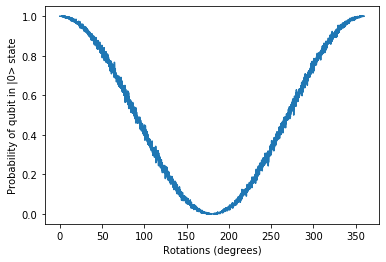

In [18]:
import cirq
import matplotlib.pyplot as plt
from pylab import *

simulator = cirq.Simulator()
qubit = cirq.NamedQubit('qubit')

step = 1800
repetitions = 1000 # 1000 shots per measurement
cycle = 1
finalResult = list()

for i in range(2*step):
    circuit = cirq.Circuit()
    identifier = str('%.2f'%(i*np.pi/step)) + "π"
    
    circuit.append(cirq.rx(i*np.pi/step)(qubit))
    circuit.append(cirq.measure(qubit, key='x'))
    
    result = simulator.run(circuit, repetitions=repetitions)
    finalResult.append(result)

#     print(circuit)
#     print(result)

plotData = list()
 
for res in finalResult:
    resCounter = res.histogram(key='x')
    plotData.append(resCounter[0]/repetitions)

# print(plotData)
xlabel('Rotations (degrees)')
ylabel('Probability of qubit in |0> state')
plot(np.linspace(0, cycle*2*180, step*cycle*2), plotData)
